<a href="https://colab.research.google.com/github/andreaPorrazzo/Porrazzo-Analysis-of-climate-change-and-its-potential-impacts/blob/main/Porrazzo_Analysis_of_climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Notebook Setup
Import all needed libraries:

In [69]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv


The complete Climate Change Dataset is imported into a pandas DataFrame form the downloaded file "climate-change-excel.xls"

In [73]:
#read the data from the excel file to a pandas DataFrame
data=pd.read_excel('/content/drive/MyDrive/Dataset/climate-change-excel.xls') 
df = pd.DataFrame(data)

#2. Global data overview
A global overview of the imported data yields the following insights:

In [74]:
print("Shape of the original dataset:")
df.shape

Shape of the original dataset:


(13512, 28)

In [75]:
print ("Available columns:")
df.columns

Available columns:


Index(['Country code', 'Country name',  'Series code',  'Series name',
              'SCALE',     'Decimals',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [76]:
print("Overiew of the first 5 rows:")
df.head()

Overiew of the first 5 rows:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [77]:
print("Descriptive statistics of the columns:")
df.describe()

Descriptive statistics of the columns:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


To better understand the nature of the "Serial Code", "Serial Name", "SCALE" and "Decimal" columns, it is necessary to examine their values.

The next fragment prints the contents of the 'Series Name' column:

In [78]:
df['Series name'].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

Contents of the column 'Series code'

In [79]:
df['Series code'].unique()

array(['AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE',
       'EN.ATM.NOXE.KT.CE', 'EN.CLC.AERT', 'EN.CLC.DRSK.XQ',
       'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP',
       'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS',
       'EN.CLC.MMDT.C', 'EN.CLC.NAMA', 'EN.CLC.NAPA', 'EN.CLC.NCOM',
       'EN.CLC.PCAT.C', 'EN.CLC.PCCC', 'EN.CLC.PCHW', 'EN.CLC.PCPT.MM',
       'EN.CLC.RNET', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS',
       'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ',
       'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD',
       'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS',
       'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS',
       'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS',
       'SH.MED.NUMW.P3', 'S

Contents of the column 'SCALE':

In [80]:
df['SCALE'].unique()

array([0, 'Text'], dtype=object)

Contents of the column 'Decimals':

In [81]:
df['Decimals'].unique()

array([1, 0, 'Text'], dtype=object)

At this time it is not clear which values are marked with the 'Text' label in the 'SCALE' and 'Decimals' columns. These are shown in the following tow outputs:

In [82]:
df[df['SCALE']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


Findings from the global overview recap:


*   shape: 28 columns, 13512 rows
*   all columns are of type "object"
*   the missing values are denoted by NaN 
*  the rows marked as 'Text' in the columns 'SCALE' and 'Decimals' are almost completely composed of NaN values
*  the columns represent key values are country, years, the series code and series name
*  the column 'Series name' contains the country-specific features required for the analysis




#3. Define the inital project goals


The first overview of the raw data makes it possible to define the initial aims and objectives of the machine learning project. These will be refined going forward as additional information is derived from the data. However, this initial goal definition will help develop a strategy and organize the data cleaning, transformation and visualization.

The data series available can be summarized into the following country-specific parameter/feature categories:


*   various emissions of greenhouse gases 
*   population-specific parameters
*   country economic indicators
*   land-related parameters
*   climate data
*   etc

Initial goal of the machine learning project: Analyze the relationships among these variable categories and evaluate the contribution of factors like country economy, energy use, land use, etc. on greenhouse gas emissions, precipitations, etc.





#4. Data cleaning


Organization of the data cleaning and transformation

The main purpose of data cleaning and transformation is to represent the characteristics (the country parameters contained in the column 'Series name') in separate columns and make each row identifiable by country and year. At the same time, it would make sense to transform the years into a single column.

Additionally, it is necessary to get rid of empty rows or columns and deal with the remaining cells with missing values.

#4.1 Removing rows marked as "Text" in the "SCALE" and "Decimals" columns

In [83]:
# create new DataFrame in which the data will be modified
data_clean=df

print("Original number of rows:")
print(data_clean.shape[0])

# remove rows characterized as "Text" in the SCALE column
data_clean = data_clean[data_clean['SCALE']!= 'Text']

print("Current number of rows:")
print(data_clean.shape[0])


Original number of rows:
13512
Current number of rows:
10017


#4.2 Removing the unnecessary columns "Country name", "Series code", "SCALE", "Decimals"

In [84]:
print("Original number of columns:")
print(data_clean.shape[1])

data_clean = data_clean.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')

print("Current number of columns:")
print(data_clean.shape[1])

Original number of columns:
28
Current number of columns:
24


#4.3 Transform the ".." strings and empty cells (" ") into NaN values for easier recognission as missing values

In [85]:
data_clean.iloc[:,2:]= data_clean.iloc[:,2:].replace({'':np.nan, '..':np.nan})

#4.4 Tranform all data columns into a numerical data type

In [86]:
data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x,errors='ignore'))

print("Print the column data types after transformation:")
data_clean2.dtypes

Print the column data types after transformation:


Country code     object
Series name      object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
dtype: object

#4.5 Rename the features in column "Series name"

The variable names in the column "Series name" are to long and not pratical to use in the code. So, I renamed with a shorter names.

In [87]:
# define shorter names corresponding to most relevant variables in a dictionary
chosen_vars = {'Cereal yield (kg per hectare)': 'cereal_yield',
               'Foreign direct investment, net inflows (% of GDP)': 'fdi_perc_gdp',
               'Access to electricity (% of total population)': 'elec_access_perc',
               'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'en_per_gdp',
               'Energy use per capita (kilograms of oil equivalent)': 'en_per_cap',
               'CO2 emissions, total (KtCO2)': 'co2_ttl',
               'CO2 emissions per capita (metric tons)': 'co2_per_cap',
               'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
               'Other GHG emissions, total (KtCO2e)': 'other_ghg_ttl',
               'Methane (CH4) emissions, total (KtCO2e)': 'ch4_ttl',
               'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_ttl',
               'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
               'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
               'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
               'GDP ($)': 'gdp',
               'GNI per capita (Atlas $)': 'gni_per_cap',
               'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
               'Population growth (annual %)': 'pop_growth_perc',
               'Population': 'pop',
               'Urban population growth (annual %)': 'urb_pop_growth_perc',
               'Urban population': 'urb_pop'
                }

      

In [88]:
#rename all variables in the column "Series name" with comprenhensible  shortest  version
data_clean2['Series name'] = data_clean2['Series name'].replace(to_replace= chosen_vars)

#5. Data frame transformation

In [89]:
data_clean2.head()

,Country code,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Land area below 5m (% of land area),29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Land area below 5m (% of land area),0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Land area below 5m (% of land area),4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is necessary to transform the data frame into a suitable format- the feature from the 'Series name' column into separate columns and the years into a single column. This is done by picking the corresponding values of each feature together with their countries and years, melting these into a single column and then combine them into a new data frame with all features (based on the same countries and years):

In [90]:
#!pip install --upgrade utils

In [91]:
#!pip install --upgrade functools32

In [92]:
def reduce(func, seq):
    if len(seq) == 1:
        return seq[0]
    return func(seq[0], reduce(func, seq[1:]))

In [93]:
# save the short feature names into a list of strings
chosen_cols = list(chosen_vars.values())

# define an emply list, where sub-dataframes for each feature will be saved
frame_list = []

# iterate over all chosen features
for feature in chosen_cols:

  frame = data_clean2[data_clean2['Series name'] == feature]

 
  frame = frame.melt(id_vars=['Country code', 'Series name']).rename(columns={'Country code': 'country', 'variable': 'year', 'value': feature}).drop(['Series name'], axis='columns')

  frame_list.append(frame)

#from functools import reduce
  #all_vars = reduce (lambda left, right: pd.merge(left, right, on=['country', 'year'], how='outer'), frame_list)
  all_vars = reduce(lambda left, right: pd.merge(left, right, on = ['country', 'year'], how = 'outer'), frame_list)

<ipython-input-93-5081d14a597f>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  all_vars = reduce(lambda left, right: pd.merge(left, right, on = ['country', 'year'], how = 'outer'), frame_list)
<ipython-input-93-5081d14a597f>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  all_vars = reduce(lambda left, right: pd.merge(left, right, on = ['country', 'year'], how = 'outer'), frame_list)
<ipython-input-93-5081d14a597f>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  all_vars = reduce(lambda left, right: pd.merge(left, right, on = ['country', 'year'], how = 'outer'), frame_list)
<ipython-input-93-5081d14a597f>:19: FutureWarning: In a future version, the Index constructor 

The new data frame after transformation

In [94]:
all_vars.head()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1990,NaN,NaN,NaN,NaN,NaN,1840.834,29.620641,NaN,...,NaN,NaN,0.105547,NaN,NaN,NaN,1.820254,62147.0,1.780501,31259.941
1,ADO,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.559145,1.028989e+09,17440.0,8.8,2.945970,52773.0,2.840429,49976.031
2,AFG,1990,1200.6,NaN,NaN,NaN,NaN,2676.910,0.140715,NaN,...,NaN,6.739396,0.432993,NaN,NaN,208.7,2.082624,19023678.0,3.492189,3481333.074
3,AGO,1990,320.9,-3.263096,NaN,172.978279,569.242999,4429.736,0.428613,130.244398,...,NaN,15.171061,12.399821,1.026019e+10,740.0,243.0,2.771320,10335052.0,6.505966,3834304.292
4,ALB,1990,2794.3,NaN,NaN,206.751128,809.215612,7488.014,2.276350,581.597641,...,NaN,NaN,4.336615,2.101625e+09,680.0,41.1,1.027427,3289483.0,1.744276,1197371.812


#6.  Remove the remaining missing values in an optimal way

Although some columns and rows with empty cells have already been deleted, there are still remaining missing values:

In [95]:
print("check the amount of missing values in each column")
all_vars.isnull().sum()



check the amount of missing values in each column


country                   0
year                      0
cereal_yield           1377
fdi_perc_gdp           1111
elec_access_perc       5027
en_per_gdp             2082
en_per_cap             1956
co2_ttl                1143
co2_per_cap            1146
co2_per_gdp            1557
other_ghg_ttl          4542
ch4_ttl                4526
n2o_ttl                4526
nat_emerg              4958
pop_urb_aggl_perc      2582
prot_area_perc          726
gdp                     779
gni_per_cap            1013
under_5_mort_rate       716
pop_growth_perc         278
pop                     252
urb_pop_growth_perc     490
urb_pop                 467
dtype: int64

The goal is to delete as many empty cells as possible, while maintaining as many columns and rows as possible. Missing values may be from missing data for some years, countries or features (columns). it is necessary to filter the data by these three categories and remove rows or columns with NaN by starting with the row/column with the highest number of missing cells. This way to clean the dataset will preserve the maximal amount of possibly valuable information in columns and rows rather than just deleting all rows with any number of missing values.

Since there are multiple appearances of unique country and year values, it is necessary to count the number of NaN values for every single year and country.


#6.1 Filtering the years by missing values

Checking the amount of missing values for each year:

In [96]:
all_vars_clean = all_vars

#define an array with the unique year values

years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(),0)

for ind, row in all_vars_clean.iterrows():
  years_count_missing[row['year']] += row.isnull().sum()

#sort the years by missing values

years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

#print the missing values for each year

print("missing values by year:")

for key, val in years_missing_sorted.items():
  print(key, ":", val)

missing values by year:
2005 : 1189
2000 : 1273
1995 : 1317
1990 : 1427
2007 : 1631
2006 : 1633
2004 : 1646
2008 : 1708
2003 : 1714
2002 : 1715
2001 : 1718
1999 : 1729
1998 : 1739
1997 : 1746
1996 : 1756
1994 : 1781
1993 : 1792
1992 : 1810
1991 : 1921
2009 : 2078
2010 : 3038
2011 : 4893


The goal of filtering is to delete rows with a significant number of missing values for certain countries without deleting too many years. It is therefore important to select the correct limit for the permitted NaN values per year. The previous production suggests selecting the years between 1991 and 2008 for the rest of the analysis.

In [97]:
print("number of missing values in whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2008, with less missing values

all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= 1991) & (all_vars_clean['year']< 2009)]

print("number of missing values in the whole dataset after filtering the years:")
all_vars_clean.isnull().sum().sum()
print("number of rows after filtering the years:")
print(all_vars_clean.shape[0])


number of missing values in whole dataset before filtering the years:
41254
number of rows before filtering the years:
5126
number of missing values in the whole dataset after filtering the years:
number of rows after filtering the years:
4194


#6.2 Filtering the countries by missing values

Repeat the same process seen for years also for the countries

In [98]:
# define an array with the unique country values

countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country

for ind, row in all_vars_clean.iterrows():
  countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values

countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country

print("missing values by country: ")
for key, val in countries_missing_sorted.items():
  print(key, ":", val)

missing values by country: 
AGO : 81
ARG : 81
AUS : 81
AUT : 81
BGD : 81
BGR : 81
BOL : 81
BRA : 81
CAN : 81
CHE : 81
CHL : 81
CHN : 81
CIV : 81
CMR : 81
COG : 81
COL : 81
CRI : 81
DEU : 81
DNK : 81
DOM : 81
ECU : 81
EGY : 81
EMU : 81
ESP : 81
FIN : 81
FRA : 81
GBR : 81
GHA : 81
GTM : 81
HND : 81
HUN : 81
IDN : 81
IND : 81
IRL : 81
ISR : 81
ITA : 81
JOR : 81
JPN : 81
KEN : 81
KOR : 81
LAC : 81
LMC : 81
LMY : 81
MAR : 81
MEX : 81
MIC : 81
MNA : 81
MOZ : 81
MYS : 81
NGA : 81
NLD : 81
NZL : 81
PAK : 81
PAN : 81
PER : 81
PHL : 81
PRT : 81
PRY : 81
ROM : 81
SAS : 81
SAU : 81
SDN : 81
SEN : 81
SLV : 81
SWE : 81
SYR : 81
TGO : 81
THA : 81
TUR : 81
TZA : 81
UMC : 81
URY : 81
USA : 81
VEN : 81
VNM : 81
ZAF : 81
ZMB : 81
GRC : 82
POL : 82
YEM : 82
ZAR : 82
DZA : 84
ETH : 84
LIC : 84
SSA : 84
WLD : 84
ARE : 85
ECA : 85
RUS : 86
UKR : 86
ARM : 87
BLR : 87
UZB : 87
KAZ : 88
CZE : 89
IRN : 89
BEL : 90
AZE : 91
GEO : 92
LBN : 92
HTI : 94
NIC : 96
BEN : 99
BWA : 99
CYP : 99
GAB : 99
HIC : 99
JAM : 99


Remove rows for countries with many missing values

In [99]:
print("number of missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(all_vars_clean.shape[0])



number of missing values in the whole dataset before filtering the countries:
29818
number of rows before filtering the countries:
4194


In [100]:
print(type(countries_missing_sorted.values))

<class 'builtin_function_or_method'>


In [101]:
# filter only rows for countries with less than 100 missing values

countries_filter = []
countries_filter = {key: value for (key, value) in countries_missing_sorted.items() if value<100}

#for key, val in countries_missing_sorted.items():
 #if val<100:
 #     countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]


print("number of missing values in the whole database after filtering the countries")
print(all_vars_clean.isnull().sum().sum())
print("numebr of rows after filtering the countries: ")
print(all_vars_clean.shape[0])

number of missing values in the whole database after filtering the countries
9894
numebr of rows after filtering the countries: 
2106


# *6.3 Checking the columns for missing values*

In [102]:
all_vars_clean.isnull().sum()

country                   0
year                      0
cereal_yield             39
fdi_perc_gdp             40
elec_access_perc       2106
en_per_gdp                4
en_per_cap                4
co2_ttl                  11
co2_per_cap              11
co2_per_gdp              13
other_ghg_ttl          1761
ch4_ttl                1755
n2o_ttl                1755
nat_emerg              2106
pop_urb_aggl_perc       249
prot_area_perc            0
gdp                       4
gni_per_cap              36
under_5_mort_rate         0
pop_growth_perc           0
pop                       0
urb_pop_growth_perc       0
urb_pop                   0
dtype: int64

After filtered the years and the countries, I can see features with a lot of missing values, so I removed those if the missing values are more than 40.

In [103]:
#remove features with more than 40 missing values

from itertools import compress

#create a boolean mapping of features with more than 40 missing values

vars_bad = all_vars_clean.isnull().sum()>40

#remove the columns corresponding to the mapping of the features with many missing values

all_vars_clean2 = all_vars_clean.drop(compress(data = all_vars_clean.columns,selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(all_vars_clean2.isnull().sum())


Remaining missing values per column:
country                 0
year                    0
cereal_yield           39
fdi_perc_gdp           40
en_per_gdp              4
en_per_cap              4
co2_ttl                11
co2_per_cap            11
co2_per_gdp            13
prot_area_perc          0
gdp                     4
gni_per_cap            36
under_5_mort_rate       0
pop_growth_perc         0
pop                     0
urb_pop_growth_perc     0
urb_pop                 0
dtype: int64


Remove the rows with the remainin missing values

In [104]:
# delete rows with any number of missing values
all_vars_clean3 = all_vars_clean2.dropna(axis='rows', how='any')

print("Remaining missing values per row:")
print(all_vars_clean3.isnull().sum())

print("Final shape of the cleaned dataset:")
print(all_vars_clean3.shape)




Remaining missing values per row:
country                0
year                   0
cereal_yield           0
fdi_perc_gdp           0
en_per_gdp             0
en_per_cap             0
co2_ttl                0
co2_per_cap            0
co2_per_gdp            0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop                0
dtype: int64
Final shape of the cleaned dataset:
(2013, 17)


# 7. Export of the cleaned data frame to a file

In [105]:
# export the clean dataframe to a csv file
all_vars_clean3.to_csv('/content/drive/MyDrive/Dataset/data_cleaned.csv', index=False)


# 8.Define the hypothesis to be investigated

the CO2 emissions depend on the rest of the country-specific features available in the dataset such as energy use, various population metrics, GDP, cereal yield, etc. and can be predicted from these.

In [106]:
data_cleaned= pd.read_csv('/content/drive/MyDrive/Dataset/data_cleaned.csv')

In [107]:
print("Shape of the dataset:")
data_cleaned.shape


Shape of the dataset:


(2013, 17)

In [108]:
print("available columns and their data types:")
data_cleaned.dtypes



     


available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [109]:
print("Overview of the first 5 rows:")
data_cleaned.head()


Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


In [110]:
print("Descriptive statistics:")
data_cleaned.describe()


Descriptive statistics:


,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000,2.013000e+03
mean,1999.660705,2919.867212,3.298666,246.545090,2012.997896,9.433345e+05,4.762138,485.547099,12.584313,1.152511e+12,8015.830373,50.751165,1.428172,2.685650e+08,2.215452,1.210775e+08
std,5.142176,1781.404812,4.892965,181.347231,2046.360054,3.196482e+06,5.001285,403.322036,9.364192,4.501472e+12,11798.726357,49.636597,1.101394,8.809458e+08,1.634910,3.887878e+08
min,1991.000000,130.600000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,0.000000,7.684017e+08,80.000000,3.200000,-2.397174,3.631934e+05,-2.757210,1.067531e+05
25%,1995.000000,1592.700000,0.898647,135.523421,551.955632,8.173743e+03,0.922963,249.959104,5.761955,1.166202e+10,780.000000,10.100000,0.648239,7.164976e+06,0.925037,3.645826e+06
50%,2000.000000,2533.000000,2.137612,193.856062,1140.613875,5.742155e+04,3.232960,365.601256,10.676743,6.297386e+10,2320.000000,32.032505,1.431980,1.902064e+07,2.211959,9.194450e+06
75%,2004.000000,3817.000000,4.038429,284.507768,2891.092276,3.325492e+05,7.425736,581.610180,17.711076,3.401822e+11,9520.000000,77.300000,2.232435,6.806170e+07,3.315640,3.889550e+07
max,2008.000000,9184.900000,92.498934,1383.380011,15211.276243,3.064936e+07,37.393460,3343.454250,53.749825,5.580488e+13,84850.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


#9. Feature engineering

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

    

*   per capita: co2_per_cap and en_per_cap
*    per unit of GDP: co2_per_gdp and en_per_gdp
*   total values: co2_ttl
    

Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP 'en-er_gdp' with the column 'gdp' and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per $1000 of GDP ).

Create a column for the total energy use:

In [111]:
# create a column for the total energy use
data_cleaned['en_ttl'] = data_cleaned['en_per_gdp'] * data_cleaned['gdp'] /1000



choose the best unite/reference value for the CO2 emissions and the energy use

<ipython-input-112-146b9ef65056>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)


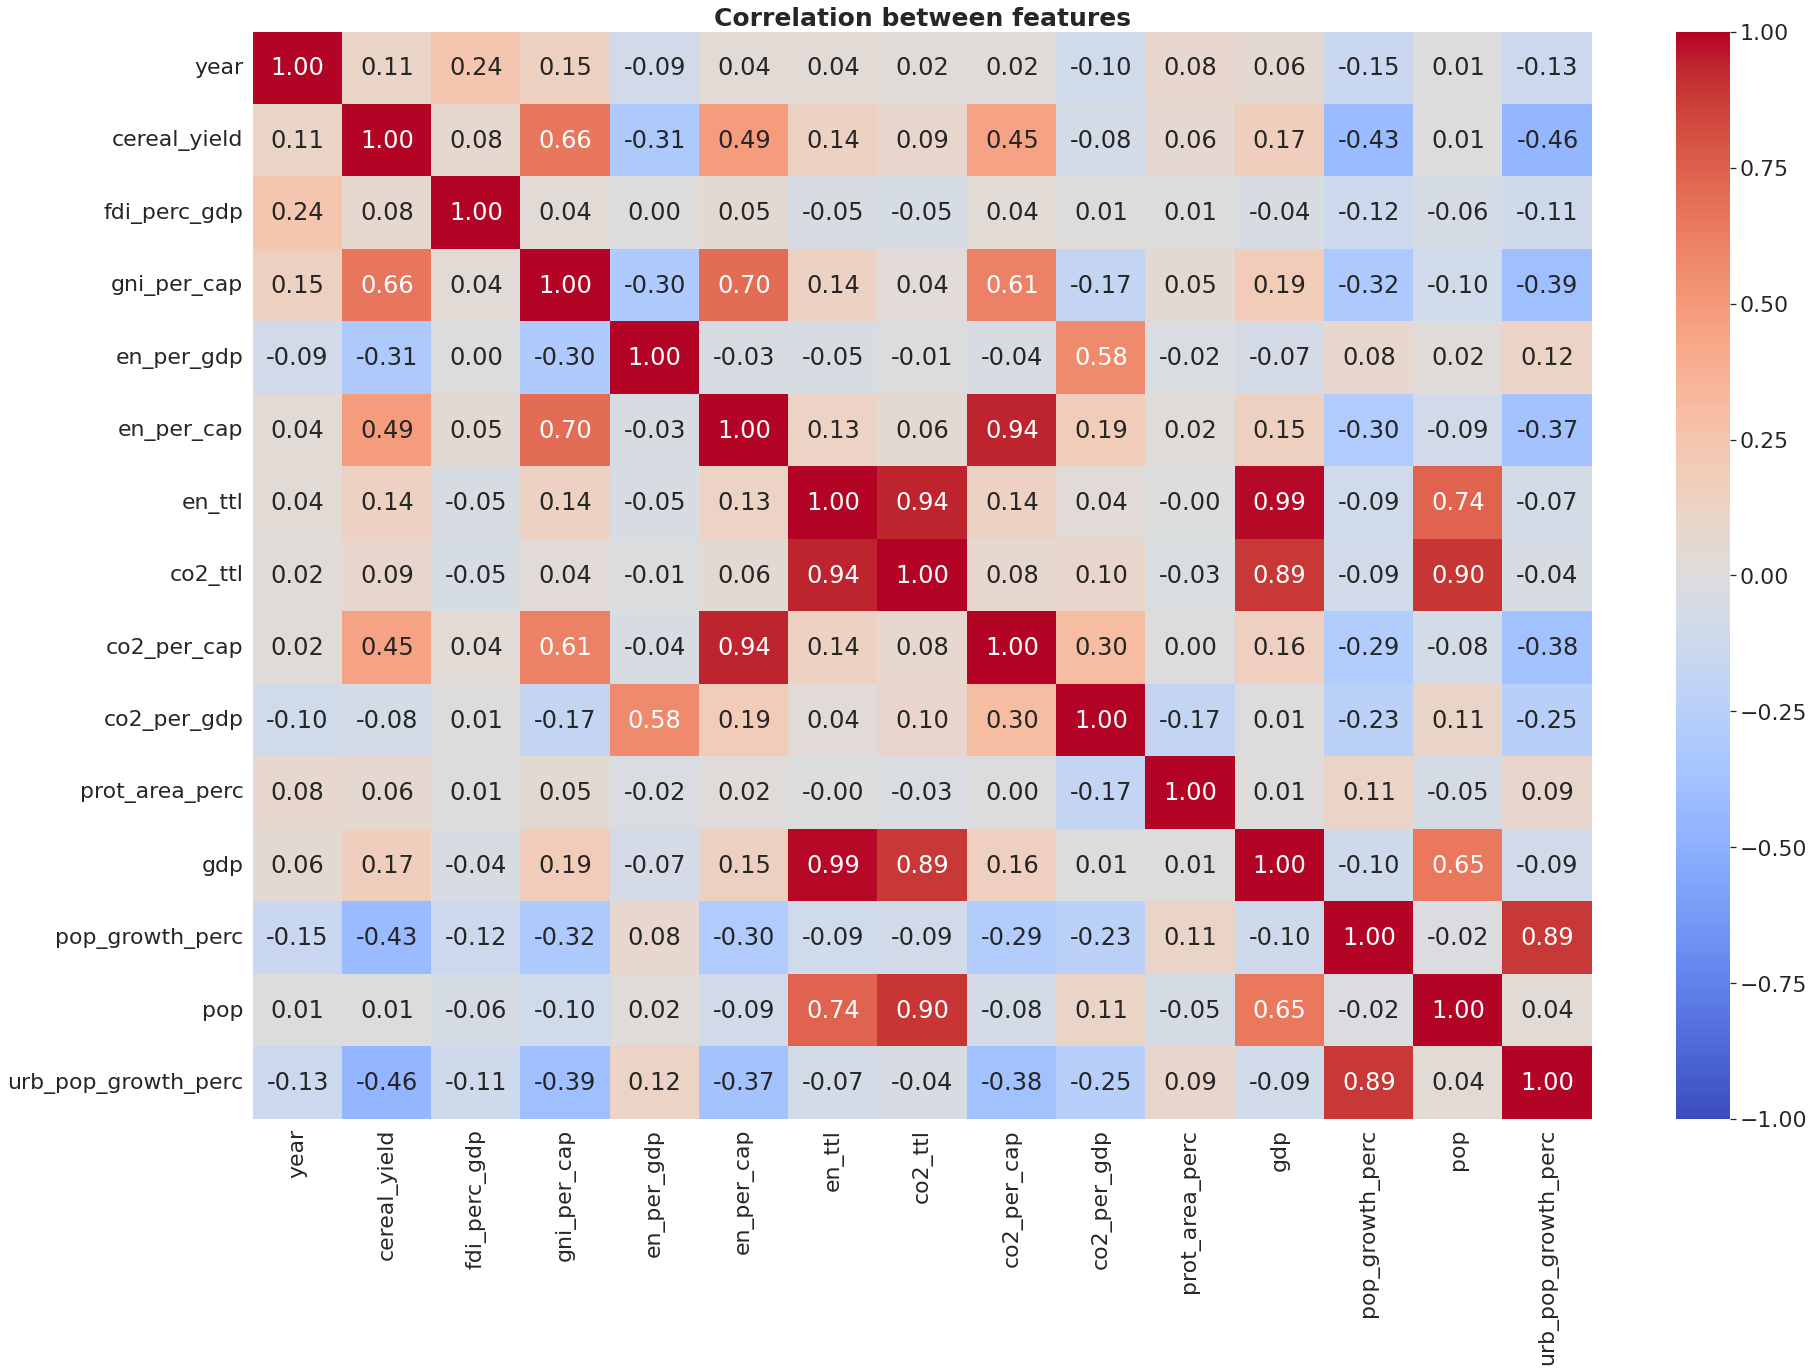

In [112]:
#select all features
#features_all = data_cleaned[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'pop','urb_pop_growth_perc']]
features_all = data_cleaned[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features with a ccorrelation matrix

sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set(font_scale=1)



In [113]:
# all features
features = features_all[['country','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

# 10. Prepare the visualizations

Plotting preparation

In [114]:


# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }


Choose a subset of countries to plot

In [115]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['ITA', 'CHN', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features[features['country'].isin(chosen_countries)]

# 11. Create plots and visualizations

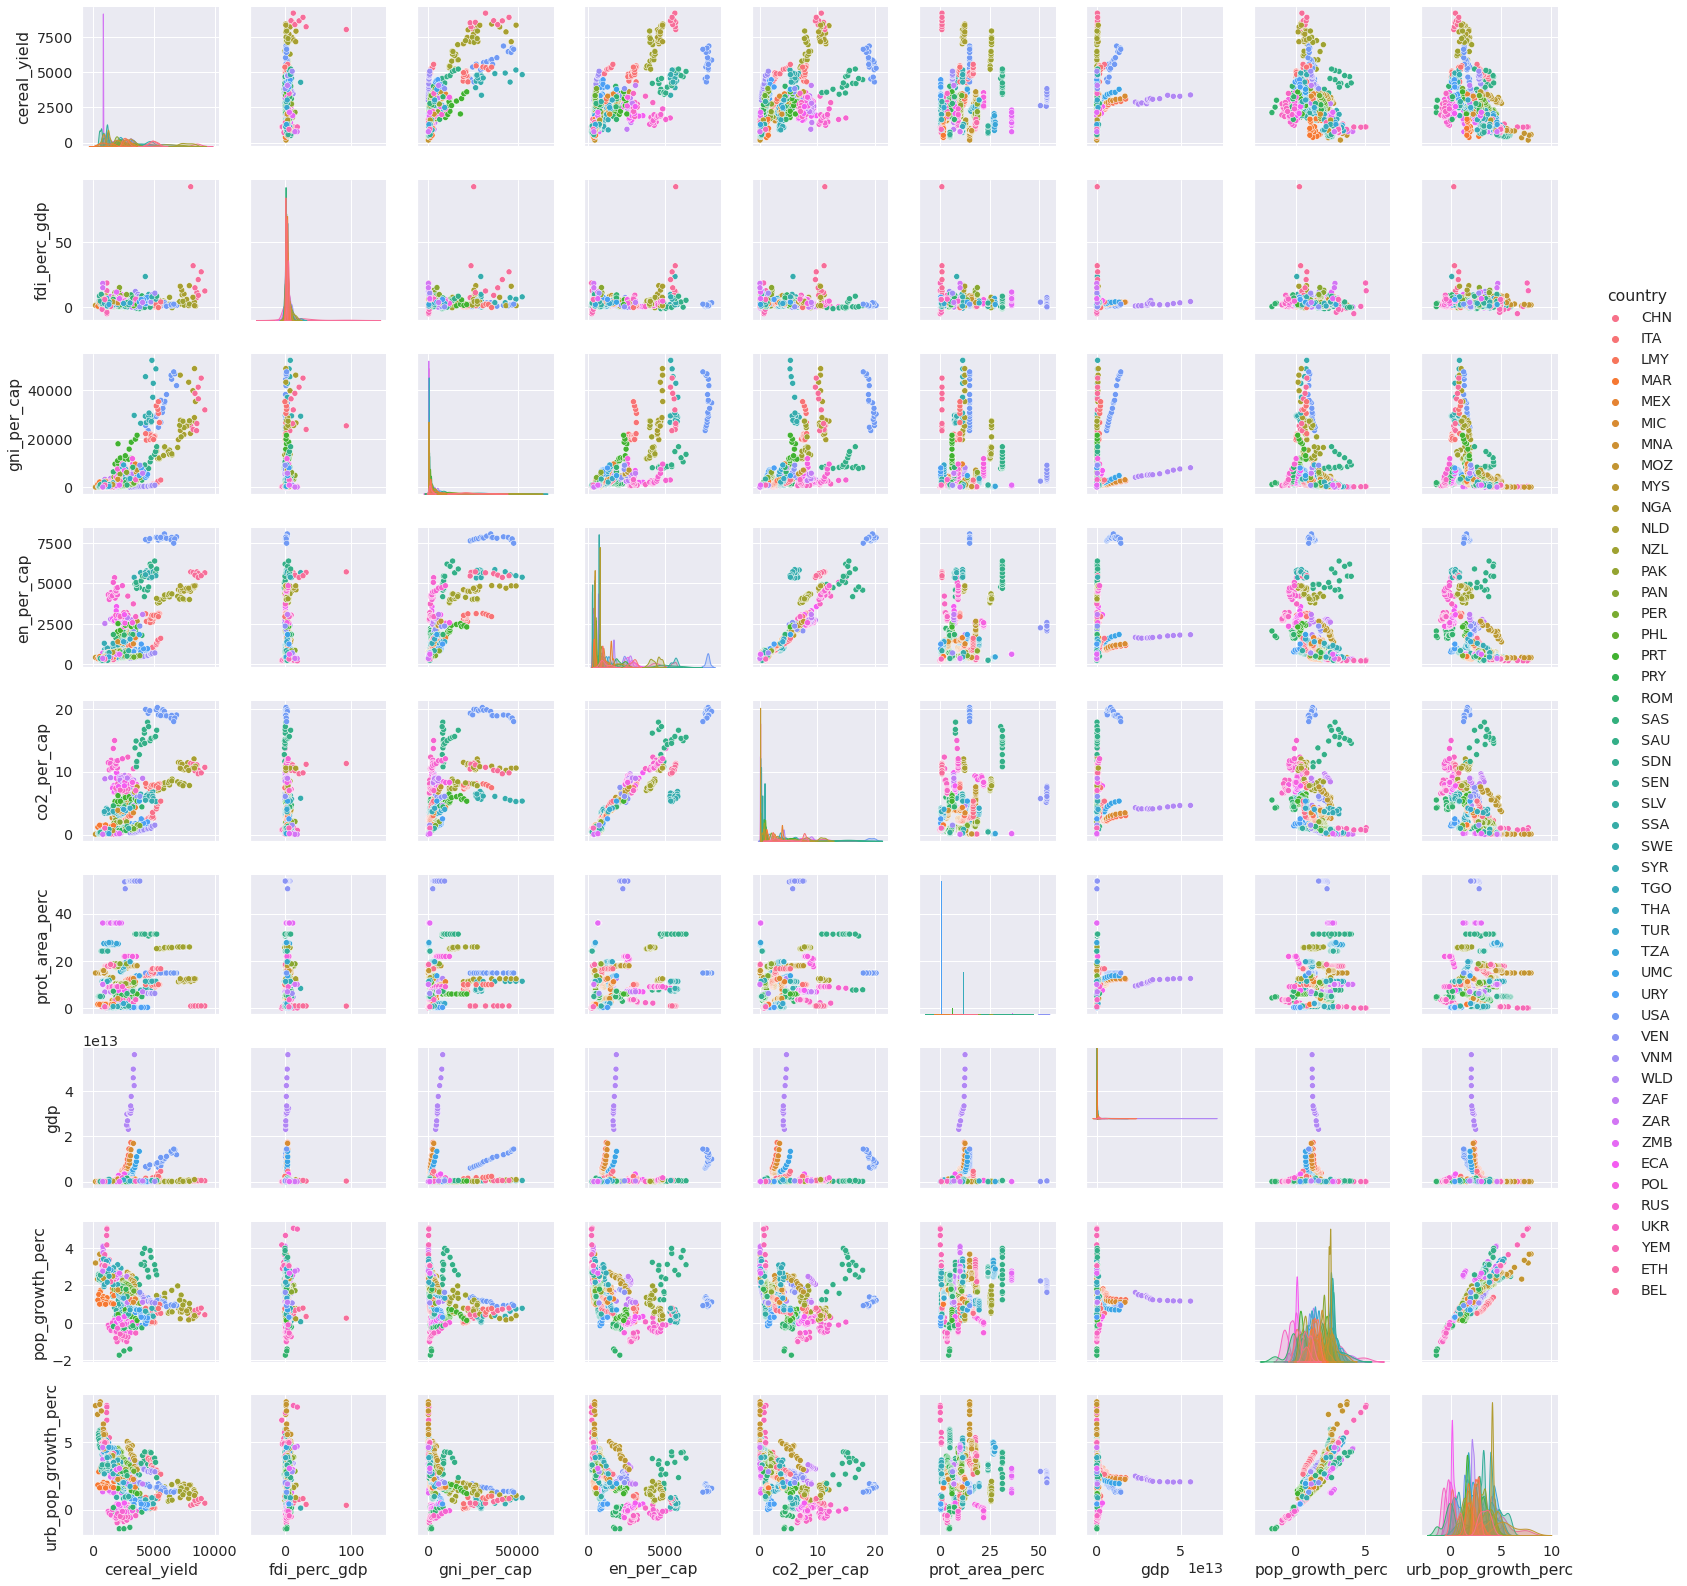

In [116]:
sns.set(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

I'm able to see the linear dependency between co2_per_cap and en_per_cap, howener I'm able to see the not linear dependency between co2_per_cap and gdp, pop_growth_perc, urb_pop_growth_perc.

These dependencies will be explored in more detail for all available countries in the following plots:

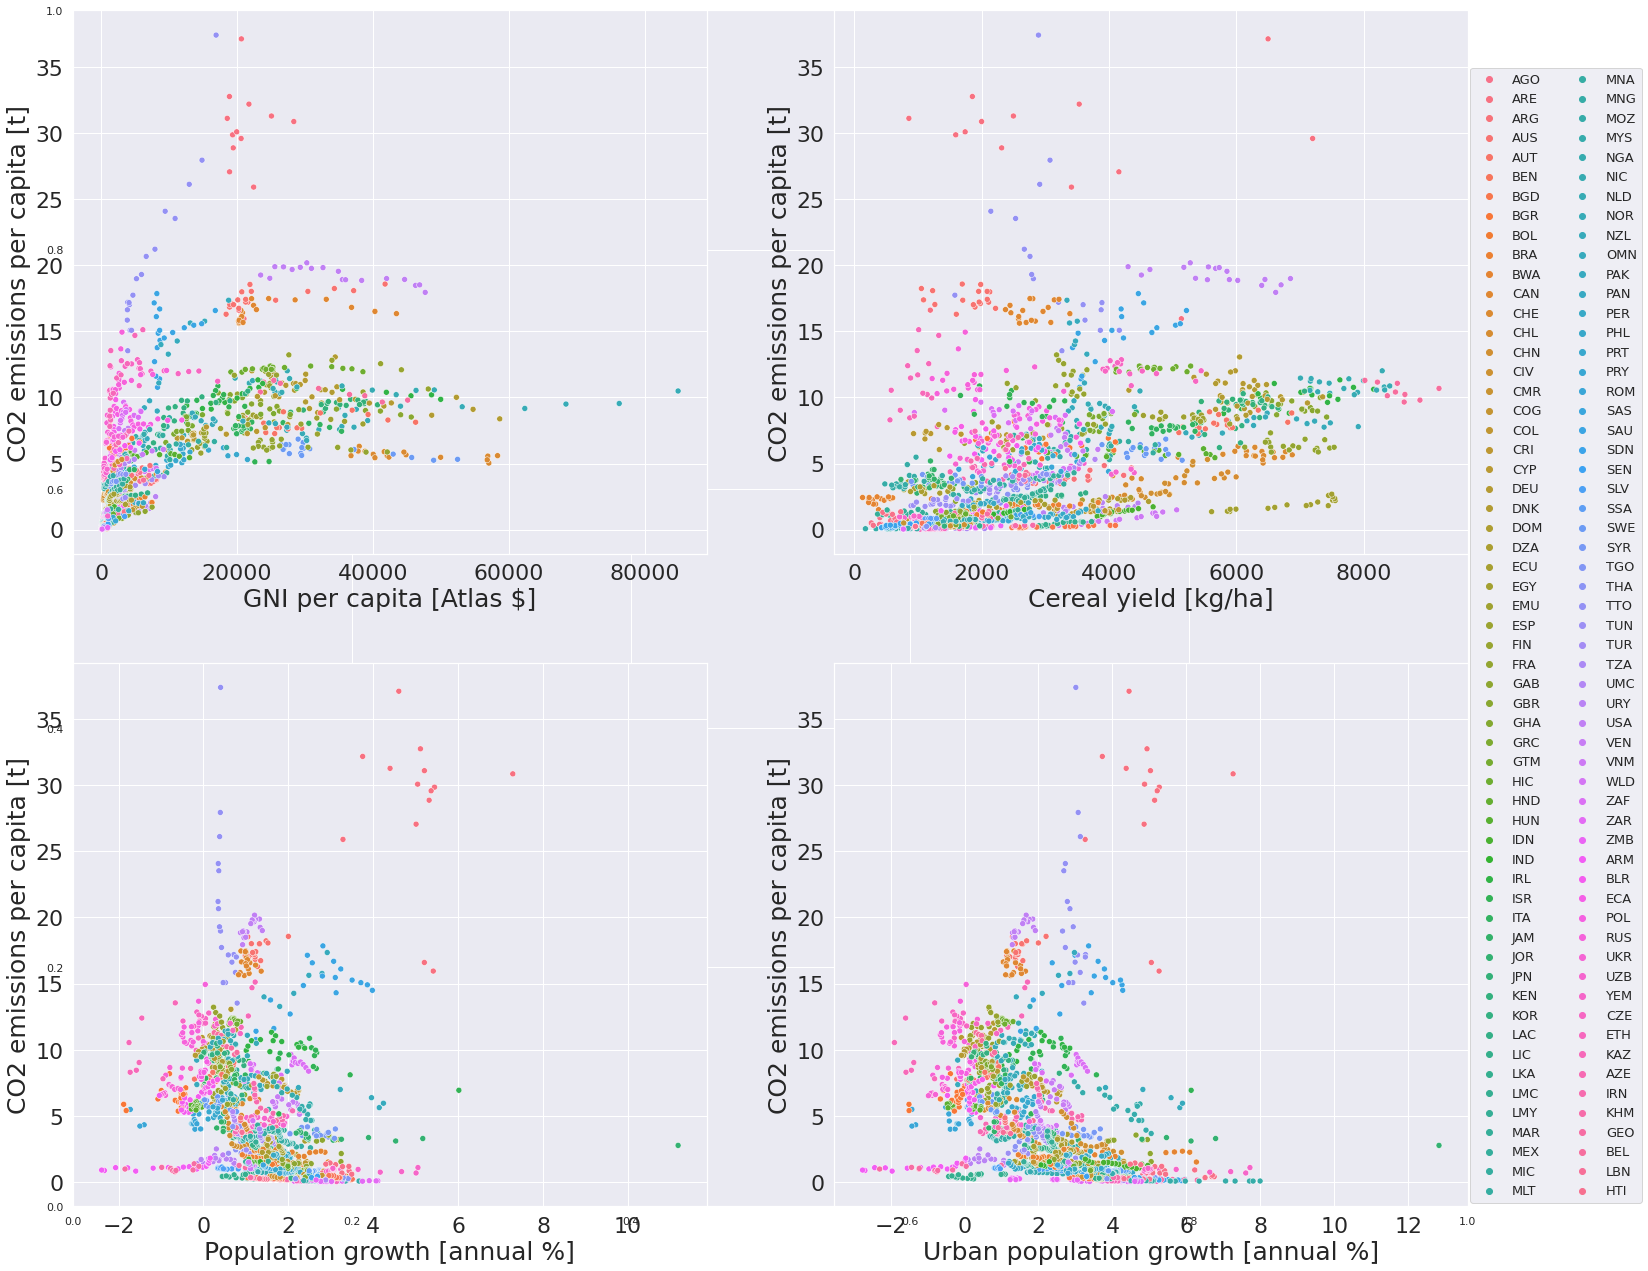

In [117]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))

ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

    
for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_growth_perc',labels_dict['pop_growth_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

# Outliners

Another aspect that draws the attention is the group of outlier points of the same tome of pink for the range of CO2 emissions per capita between 25t and 40t. Lots of these belong to the data series corresponding to the country of United Arab Emirates (country code ARE). Other outliers corresponding to certain countries can also be identified, which do not disturb the global trends that much though. After removing the rows corresponding to ARE, the plots look as follows:

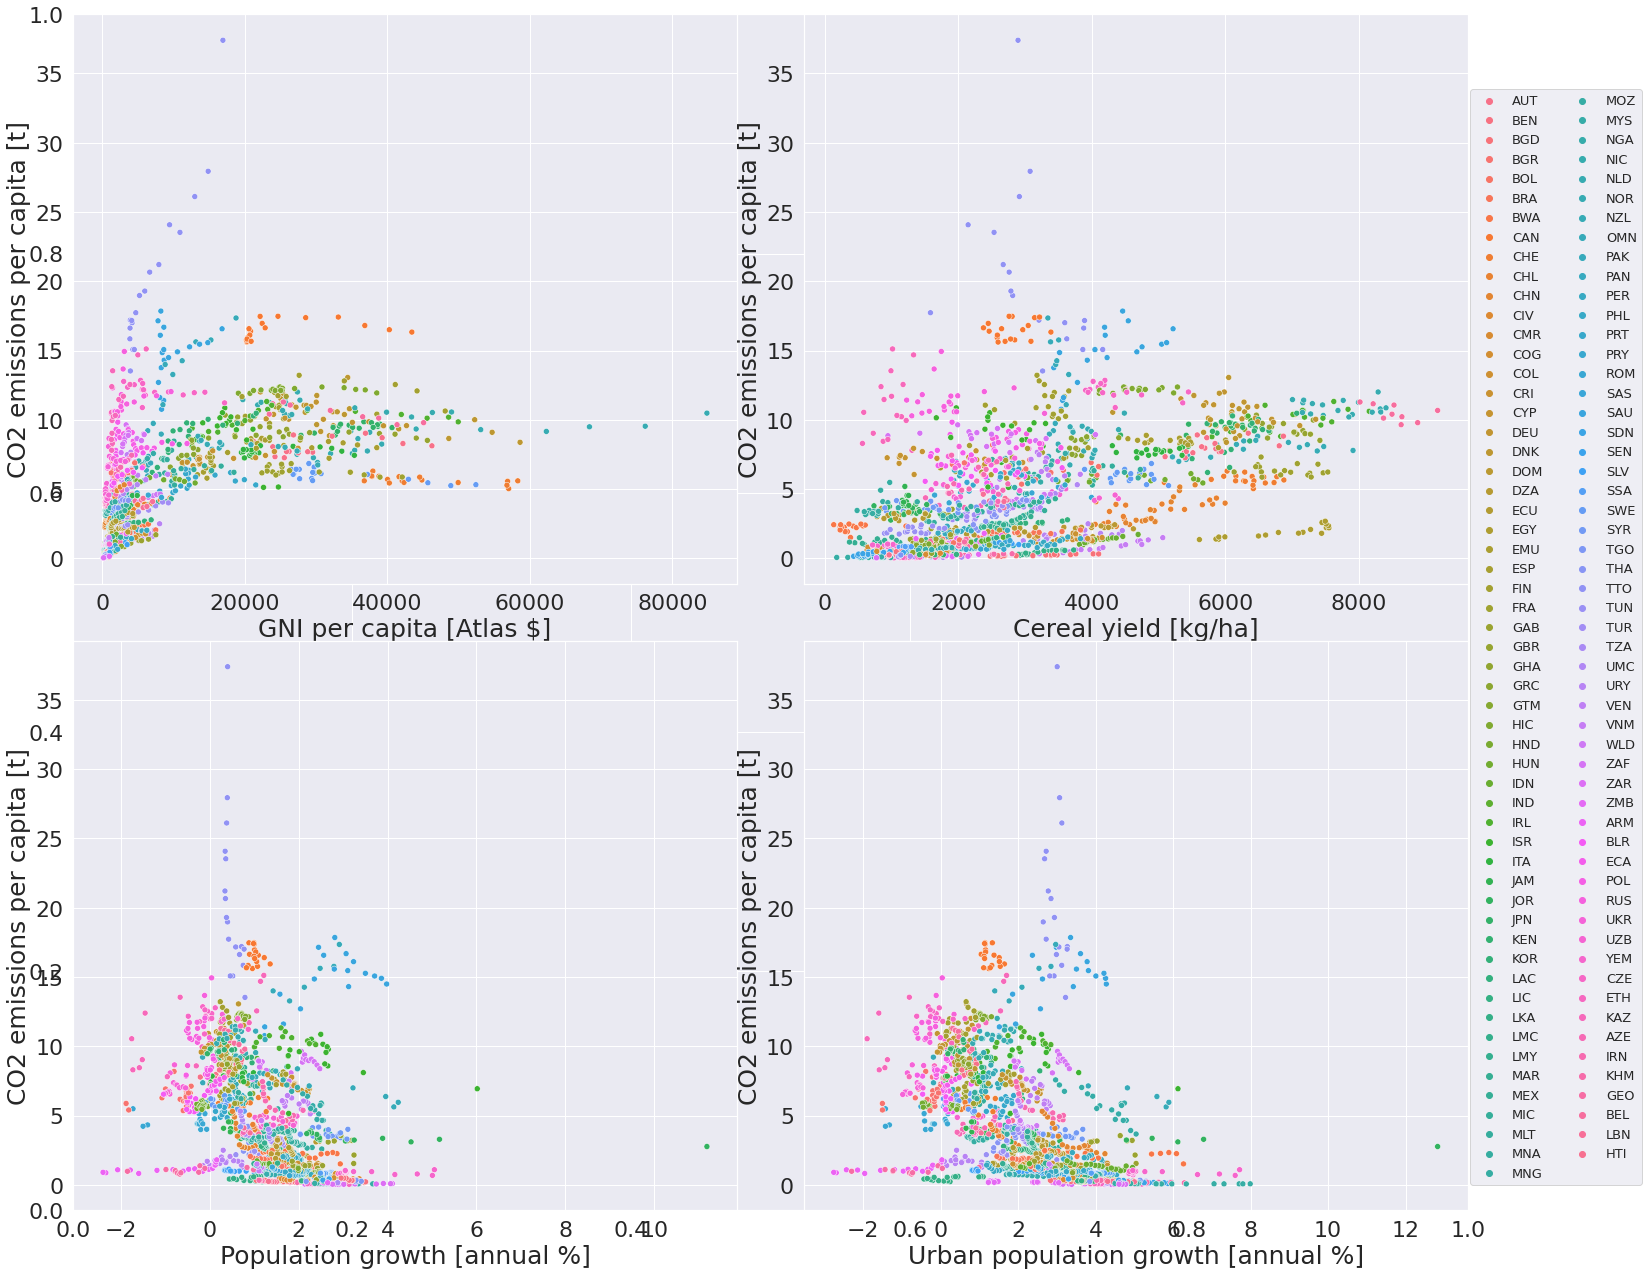

In [124]:

# remove the ARE outliers
features = features[features['country']!="ARE"]

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1

# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_growth_perc',labels_dict['pop_growth_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()


The following plot shows the relationsip between 4 variables:

Text(72.8730015625, 0.5, 'CO2 emissions per capita [t]')

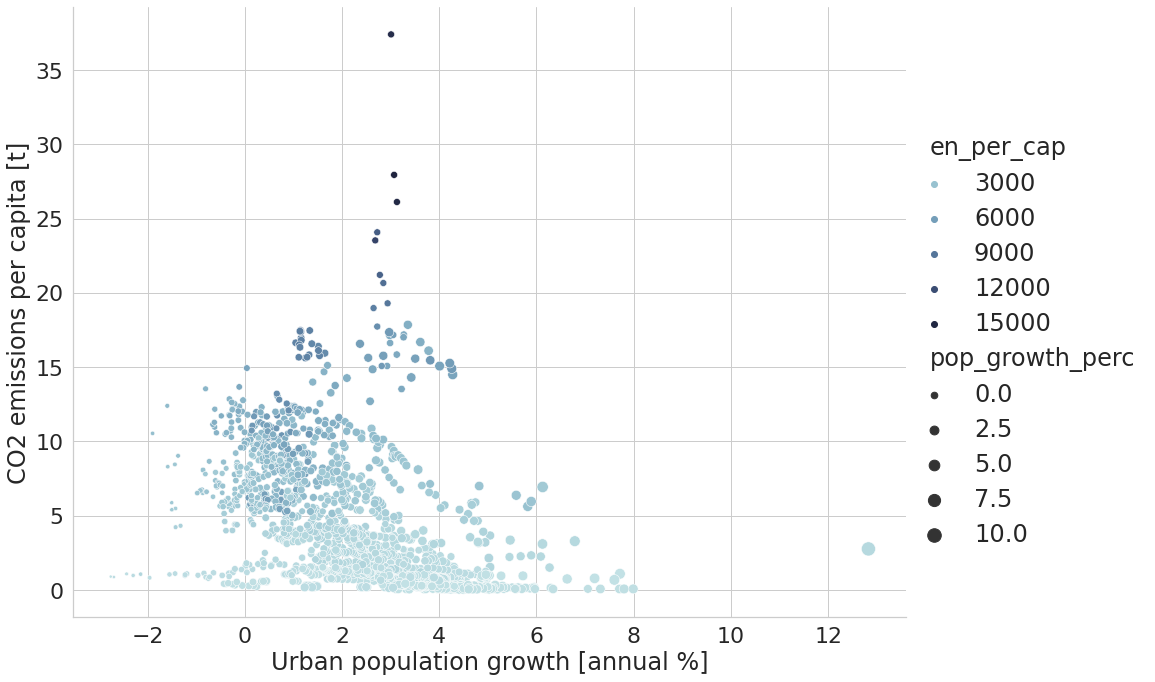

In [126]:



sns.set(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features,
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_growth_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])


#12. Visualization conclusion
